In [15]:
import torch 
ensbn = 20
stride = [16384]
mft = [1] # 10, 15, 20
bmk = [0]
lt = 32

long_context = []

for s in stride:
    for m in mft:
        for l in [0,31]:
            for b in bmk:
                long_context.append(torch.load(f'../../cache/llama/ensemble/qkvout_s{s}_k512_ensbn{ensbn}_query_mft{m}_bmk{b}_lt{lt}_l{l}.pth', map_location=torch.device('cpu')))


In [4]:
import torch 
tree_k = 512
tree_stride = [16384]

default_long = []

for s in tree_stride:
    for l in [0,31]:
        default_long.append(torch.load(f'../../cache/llama/default/qkvout_s{s}_k{tree_k}_l{l}.pth', map_location=torch.device('cpu')))

In [5]:
default_long[0]

{'q': tensor([[[[ 0.1309, -0.7539,  1.3359,  ..., -0.5312,  0.2080, -0.7930],
           [ 0.5781, -0.5312,  0.7461,  ..., -0.7578,  0.4082, -0.8594],
           [ 0.7266, -0.5820,  0.7578,  ..., -0.7578,  0.4082, -0.8594],
           ...,
           [-1.3047, -1.9062, -1.8281,  ..., -0.6836,  0.1631, -0.8828],
           [-0.7891, -2.2812, -2.5000,  ..., -1.3359,  0.6719, -1.4375],
           [-0.2461, -1.9297, -2.2344,  ..., -1.2266,  0.6641, -1.3438]],
 
          [[ 0.5742,  0.1260, -1.4844,  ..., -0.5234,  0.3145, -0.5078],
           [ 2.4062,  1.7031, -0.8047,  ..., -0.2422,  0.1660, -0.2275],
           [ 2.1562,  1.5000, -0.8711,  ..., -0.2422,  0.1660, -0.2275],
           ...,
           [ 0.1260, -0.2441,  0.2275,  ..., -0.1855, -0.4316, -0.0732],
           [-0.0078,  0.0085,  0.4043,  ...,  0.1680, -0.4629,  0.1777],
           [-0.0474,  0.1621,  0.5312,  ...,  0.1543, -0.3867,  0.1572]],
 
          [[-0.7812, -0.7305, -0.7031,  ..., -0.4277, -0.3750, -0.3691],
        

In [6]:
default_long[0]['indices']

tensor([[[    0,     2,     4,  ...,   506,   508,   510],
         [    0,     2,     4,  ...,   506,   508,   510],
         [    0,     2,     4,  ...,   506,   508,   510],
         ...,
         [11550, 11552, 11554,  ..., 16170, 16172, 16174],
         [14052, 14054, 14056,  ..., 16242, 16244, 16246],
         [12544, 12546, 12548,  ..., 16266, 16268, 16270]],

        [[    0,     2,     4,  ...,   506,   508,   510],
         [    0,     2,     4,  ...,   506,   508,   510],
         [    0,     2,     4,  ...,   506,   508,   510],
         ...,
         [12558, 12560, 12562,  ..., 16206, 16208, 16210],
         [10730, 10732, 10734,  ..., 16230, 16232, 16234],
         [12192, 12194, 12196,  ..., 16306, 16308, 16310]],

        [[    0,     2,     4,  ...,   506,   508,   510],
         [    0,     2,     4,  ...,   506,   508,   510],
         [    0,     2,     4,  ...,   506,   508,   510],
         ...,
         [ 9370,  9372,  9374,  ..., 16202, 16204, 16206],
         [

In [7]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, cmap='rainbow'):
    num_attention_maps = tensor.shape[0]
    grid_cols = math.ceil(math.sqrt(num_attention_maps))
    grid_rows = math.ceil(num_attention_maps / grid_cols)
    mask = (tensor == 9999999)
    tensor = torch.where(mask, -1, tensor)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Attention Map {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()

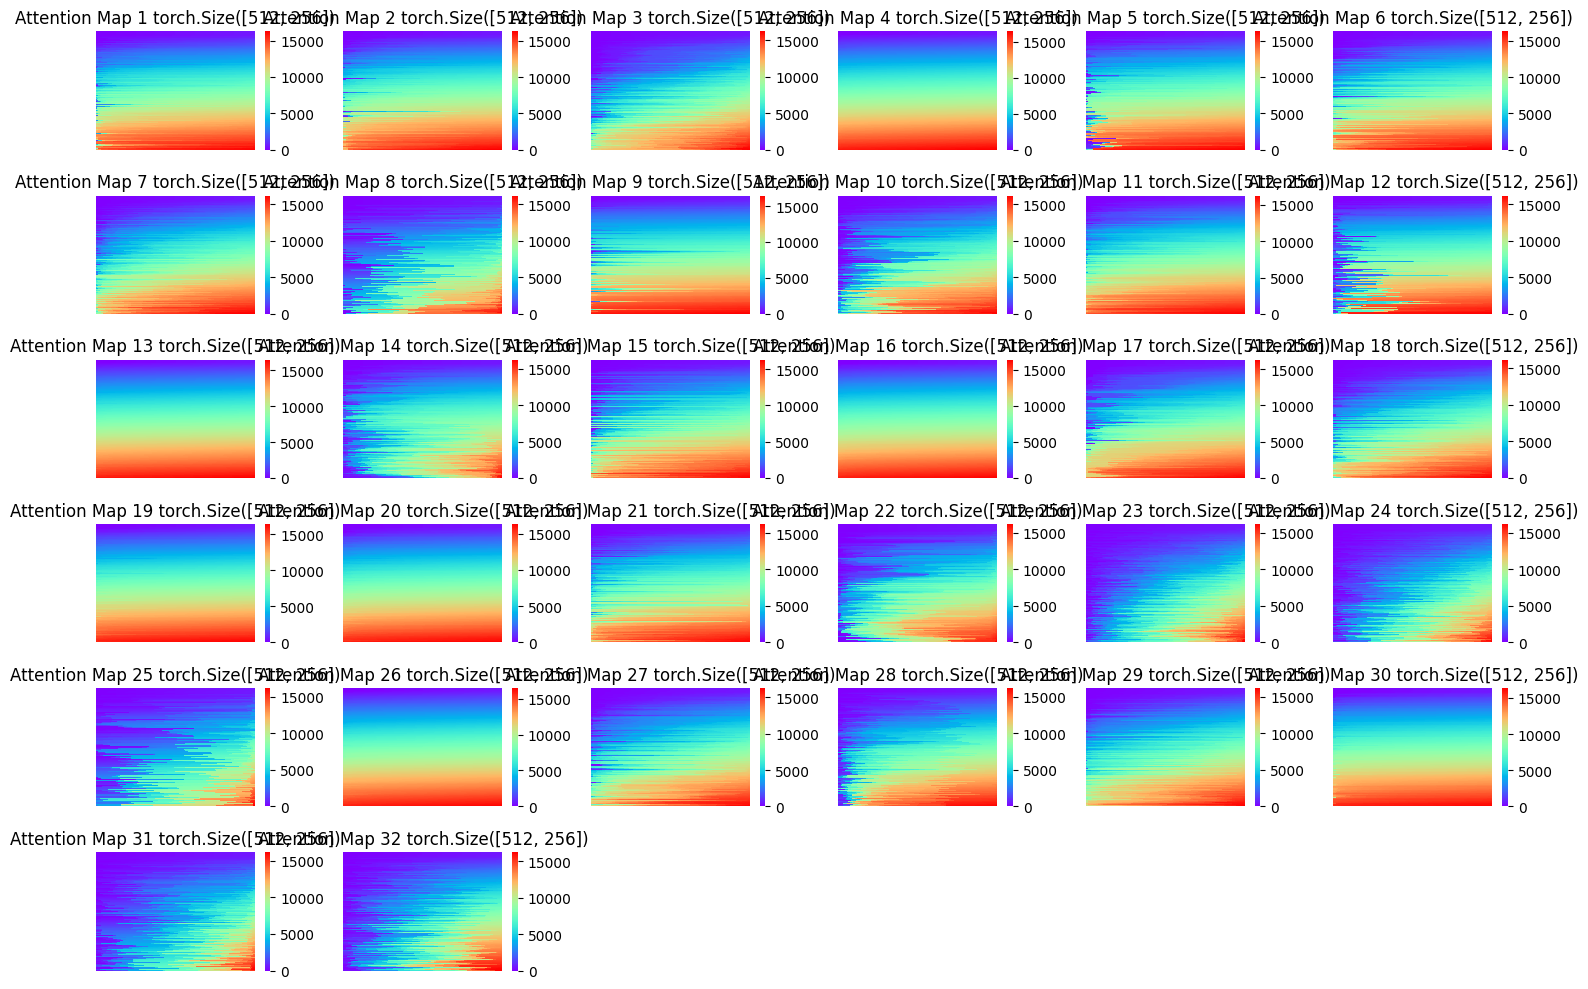

In [9]:
plot_attention_maps(default_long[0]['indices'])

In [16]:
long_context[0]

{'q': tensor([[[[ 0.1309, -0.7539,  1.3359,  ..., -0.5312,  0.2080, -0.7930],
           [ 0.5781, -0.5312,  0.7461,  ..., -0.7578,  0.4082, -0.8594],
           [ 0.7266, -0.5820,  0.7578,  ..., -0.7578,  0.4082, -0.8594],
           ...,
           [-1.3047, -1.9062, -1.8281,  ..., -0.6836,  0.1631, -0.8828],
           [-0.7891, -2.2812, -2.5000,  ..., -1.3359,  0.6719, -1.4375],
           [-0.2461, -1.9297, -2.2344,  ..., -1.2266,  0.6641, -1.3438]],
 
          [[ 0.5742,  0.1260, -1.4844,  ..., -0.5234,  0.3145, -0.5078],
           [ 2.4062,  1.7031, -0.8047,  ..., -0.2422,  0.1660, -0.2275],
           [ 2.1562,  1.5000, -0.8711,  ..., -0.2422,  0.1660, -0.2275],
           ...,
           [ 0.1260, -0.2441,  0.2275,  ..., -0.1855, -0.4316, -0.0732],
           [-0.0078,  0.0085,  0.4043,  ...,  0.1680, -0.4629,  0.1777],
           [-0.0474,  0.1621,  0.5312,  ...,  0.1543, -0.3867,  0.1572]],
 
          [[-0.7812, -0.7305, -0.7031,  ..., -0.4277, -0.3750, -0.3691],
        

In [33]:
((long_context[0]['indices']==9999999).view(-1, 542)[:, 0]).sum()

tensor(136)

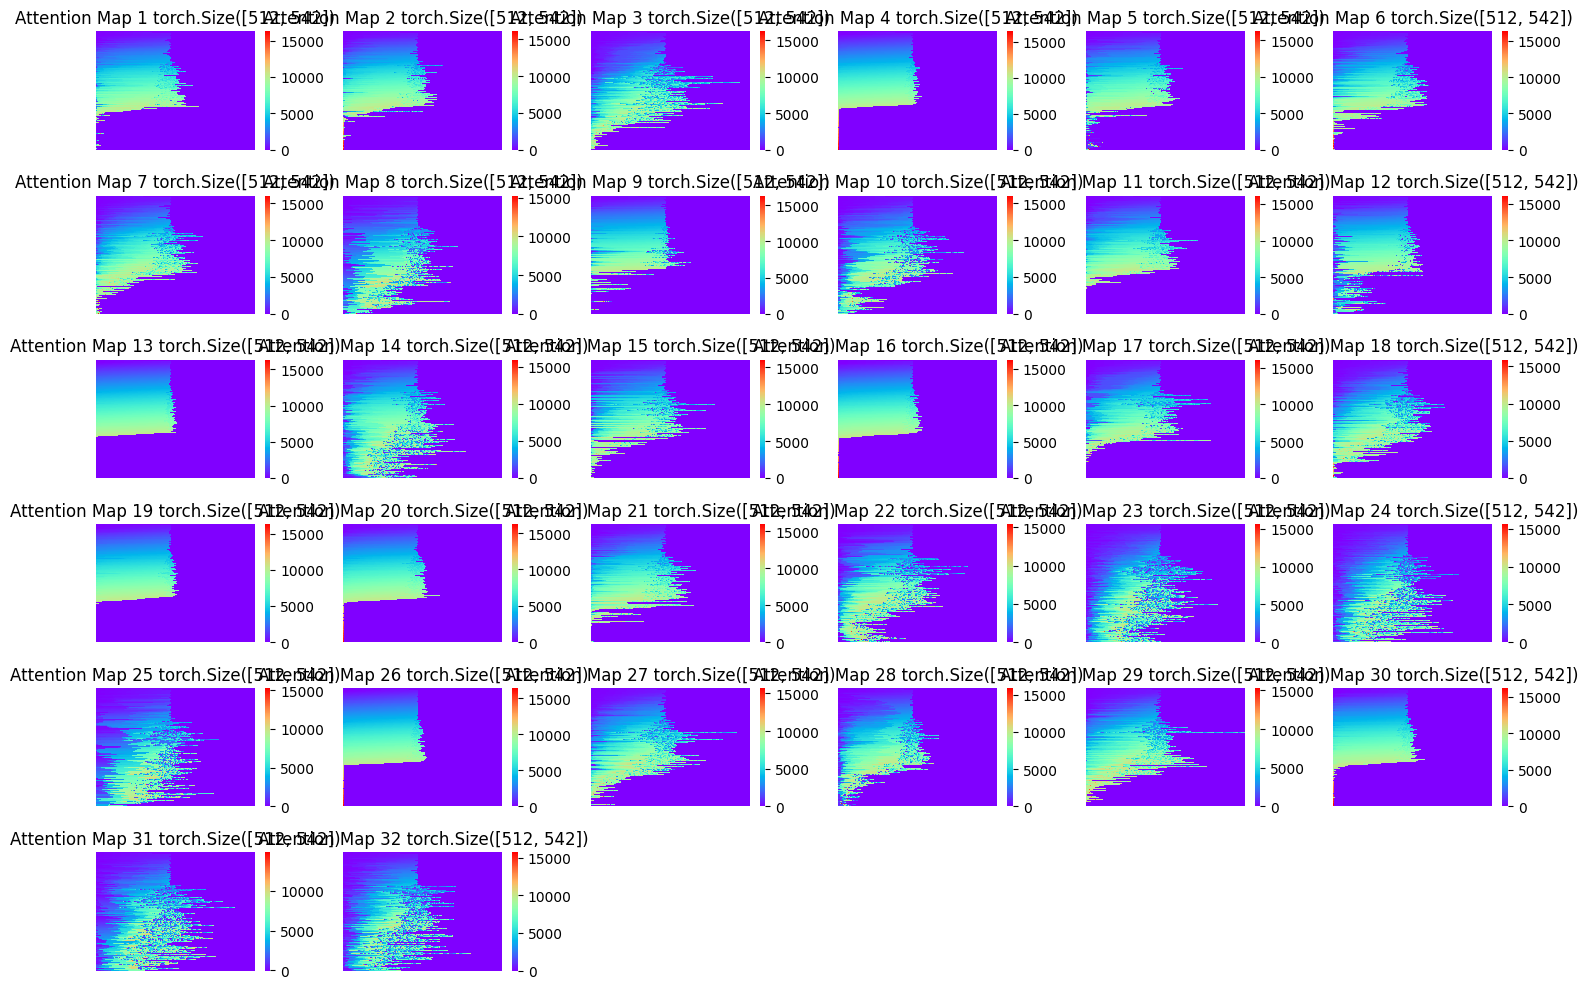

In [19]:
plot_attention_maps(long_context[0]['indices'][:,:,:])


In [41]:
MASK_K_BK = 10
indices = 
range_tensor = torch.arange(MASK_K_BK).expand_as(indices)
print(range_tensor)

NameError: name 'indices' is not defined

In [60]:
(long_context[0]['ks'] > 256).sum()

tensor(6676)

In [59]:
(long_context[0]['ks'] >= 512).sum()

tensor(3)

In [63]:
long_context[0]['ks'].shape

torch.Size([32, 512])

In [64]:
32*512

16384

In [56]:
(long_context[0]['ks']).max(dim=1)[0]

tensor([368, 341, 510, 284, 356, 457, 387, 392, 341, 428, 386, 344, 278, 424,
        472, 296, 497, 448, 299, 330, 418, 526, 487, 505, 479, 300, 500, 409,
        542, 317, 484, 513])

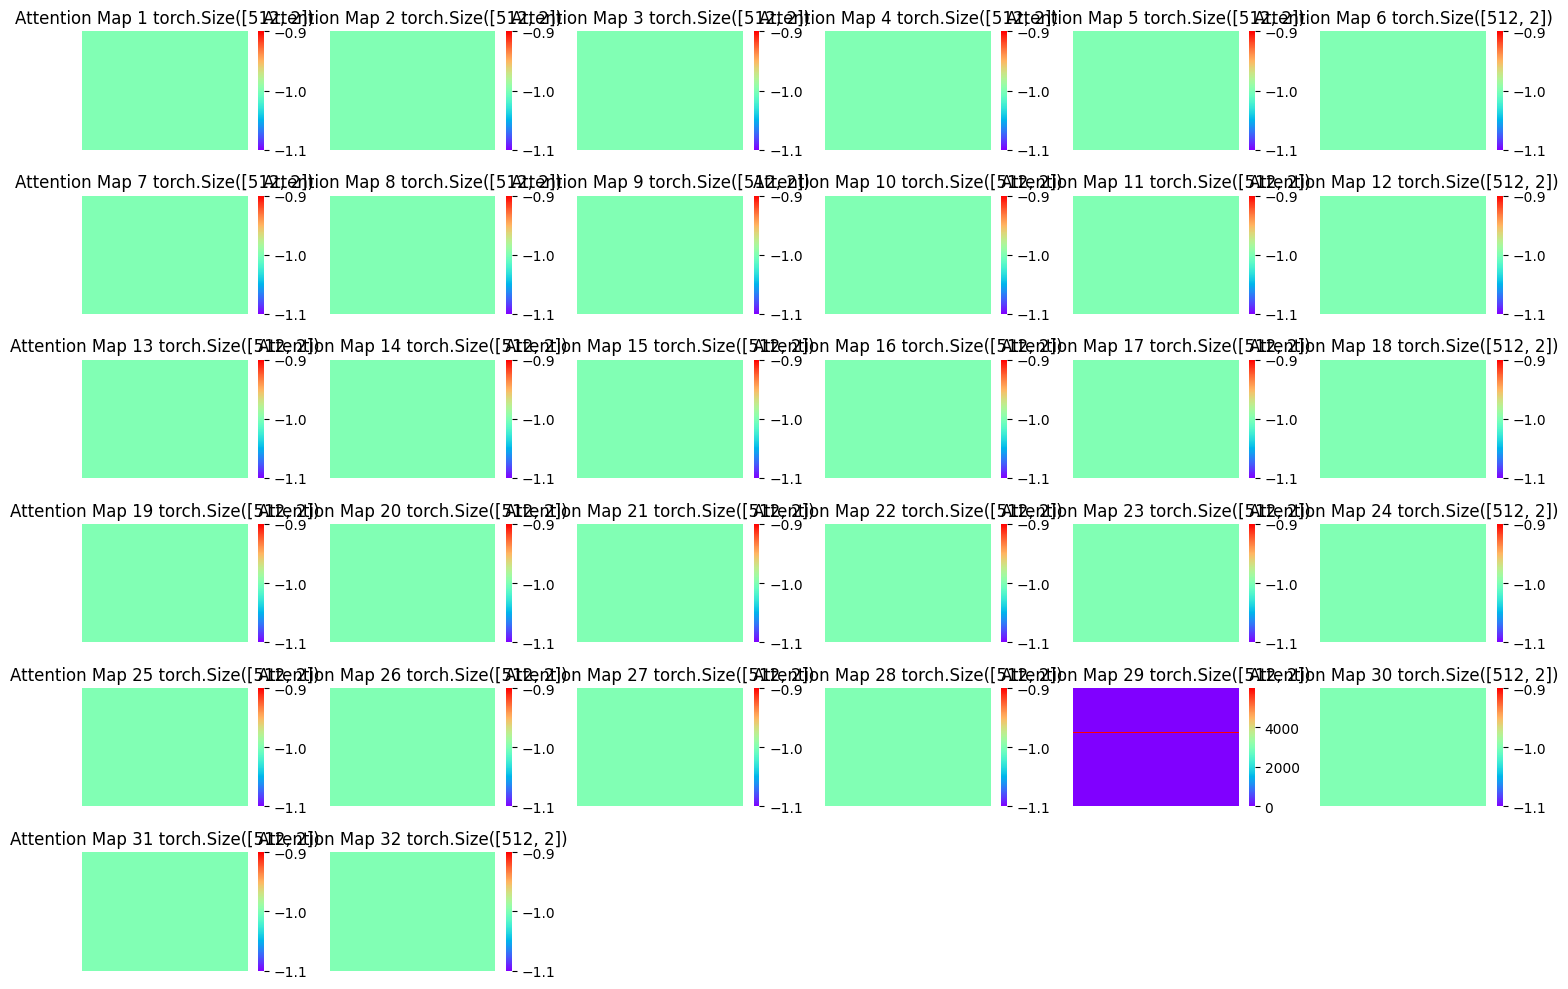

In [18]:
plot_attention_maps(long_context[0]['indices'][:,:,-2:])


In [10]:
default_long[0]['k'].shape

torch.Size([1, 32, 16384, 128])

In [39]:
(long_context[0]['indices'] <16384).sum() / (default_long[0]['indices'] < 16384).sum()

tensor(0.8276)

In [35]:
(long_context[0]['indices'] <9999999).sum()

tensor(3470957)

In [13]:
(default_long[0]['indices'] < 16384).sum()

tensor(4193900)

In [36]:
for l in long_context:
    print(l['indices'].shape)

torch.Size([32, 384, 423])
torch.Size([32, 384, 256])
torch.Size([32, 384, 433])
torch.Size([32, 384, 256])
torch.Size([32, 512, 423])
torch.Size([32, 512, 256])
torch.Size([32, 512, 433])
torch.Size([32, 512, 256])


In [12]:
long_context[0]['indices'].shape

torch.Size([32, 384, 423])

In [37]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, cmap='rainbow'):
    num_attention_maps = tensor.shape[0]
    grid_cols = math.ceil(math.sqrt(num_attention_maps))
    grid_rows = math.ceil(num_attention_maps / grid_cols)
    mask = (tensor == 9999999)
    tensor = torch.where(mask, -1, tensor)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Attention Map {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()

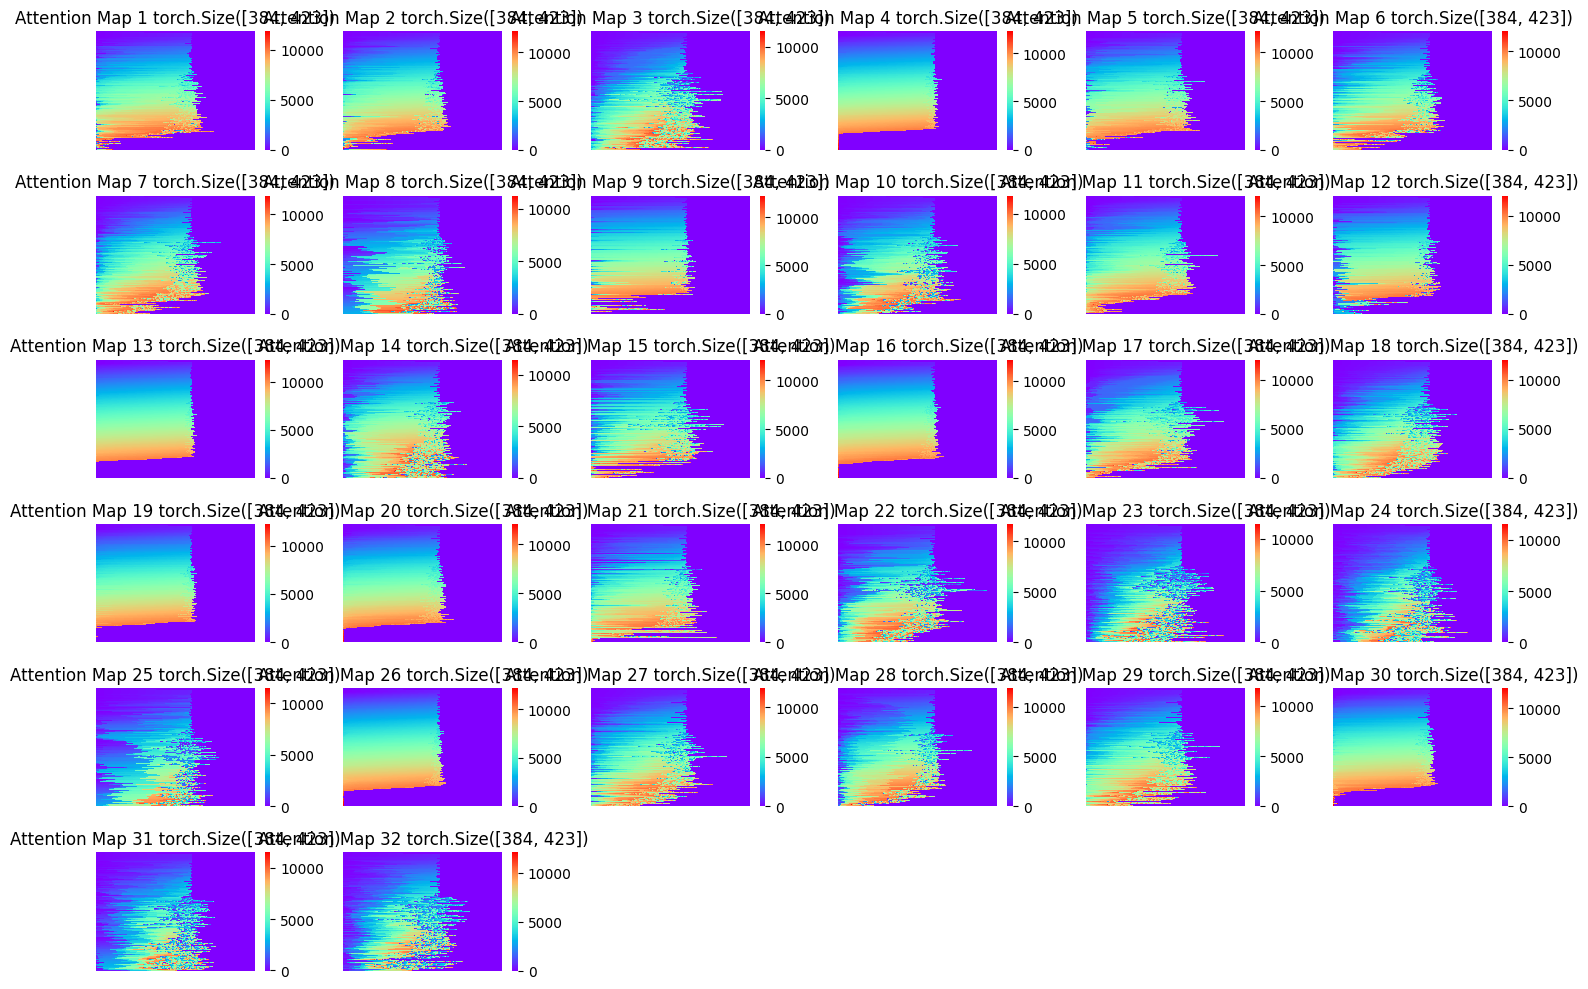

In [15]:
plot_attention_maps(long_context[0]['indices'], cmap='rainbow')  # Change cmap as needed

In [31]:
def find_first_32000(tensor):
    filtered_mask = tensor != 9999999

    # print(filtered_mask.shape, filtered_mask, filtered_mask.sum(-2).shape, )
    # print(filtered_mask.sum(-2))

    is_zero = filtered_mask.sum(-2) == 0

    # Determine which columns have all zeros
    columns_with_all_zeros = torch.all(is_zero, dim=0)

    # Find the first index where all values in a column are zero
    first_column_with_all_zeros = torch.nonzero(columns_with_all_zeros, as_tuple=True)

    # If there is at least one column with all zeros, get the first one
    if len(first_column_with_all_zeros[0]) > 0:
        first_index = first_column_with_all_zeros[0][0].item()  # Get the index of the first such column
    else:
        first_index = -1  # If no columns contain all zeros

    print("First index where all values are zero:", first_index)

In [32]:
for tl in long_context:
    find_first_32000(tl['indices'])

First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1


In [28]:
mask = (long_context[0]['indices'][2,:, -2:]==9999999)
tensor = torch.where(mask, -1, long_context[0]['indices'][2,:, -2:])

In [29]:
tensor

tensor([[-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.0000e+00],
        [-1.0000e+00, -1.000

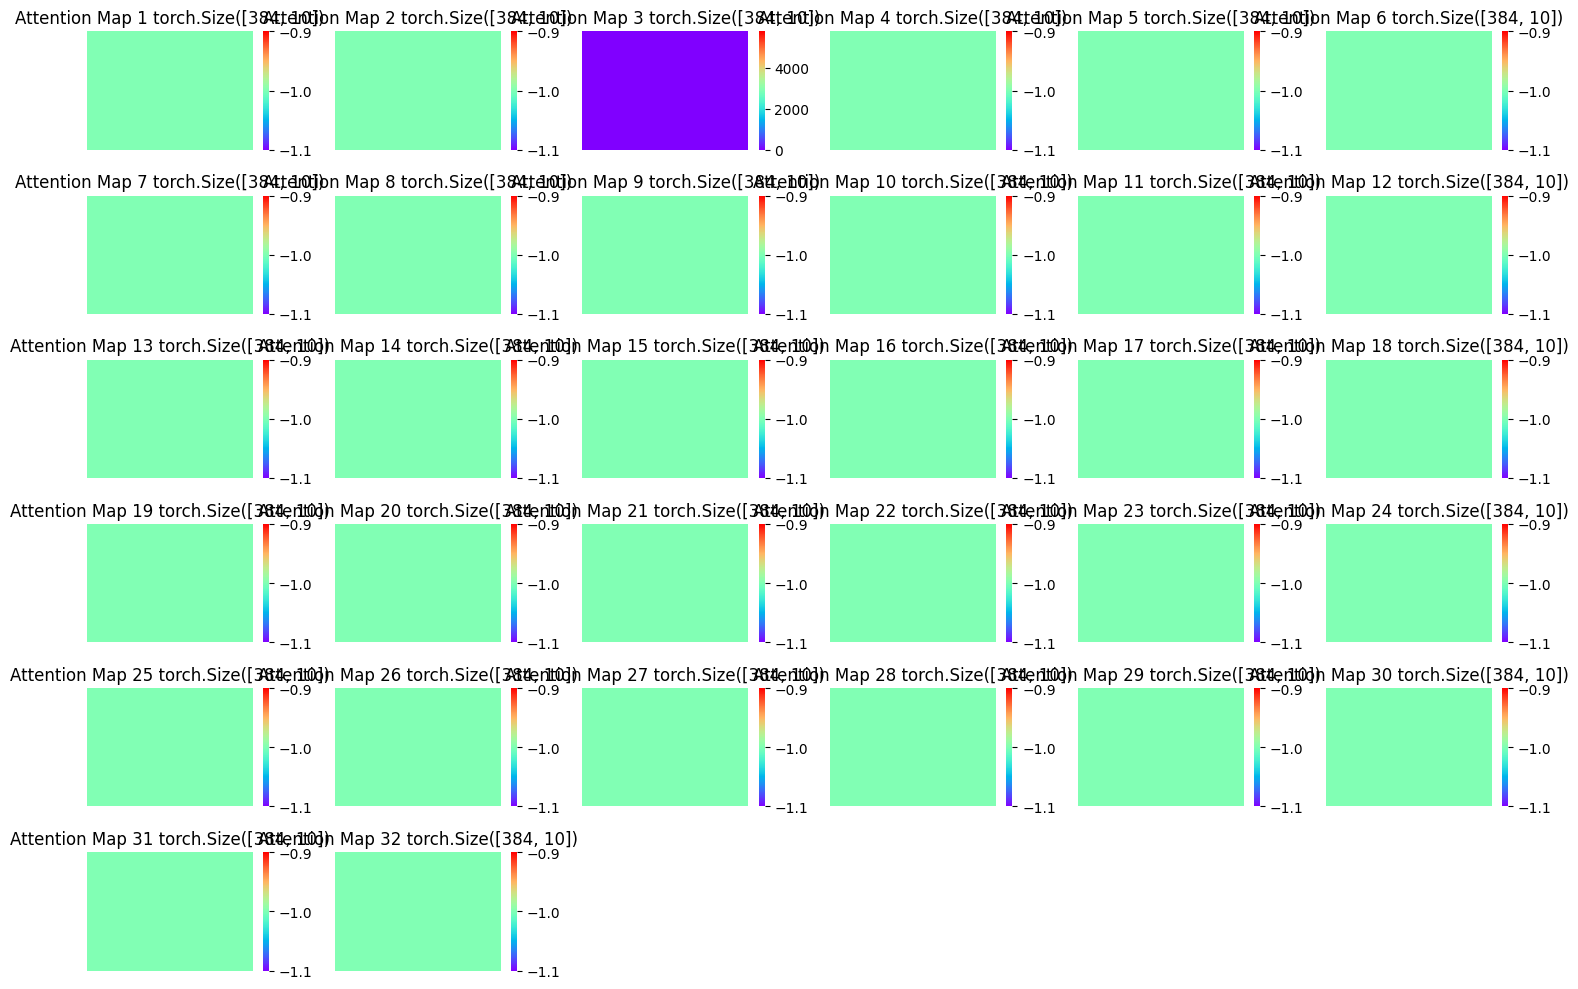

In [30]:
plot_attention_maps(long_context[0]['indices'][:,:, -10:], cmap='rainbow')  # Change cmap as needed

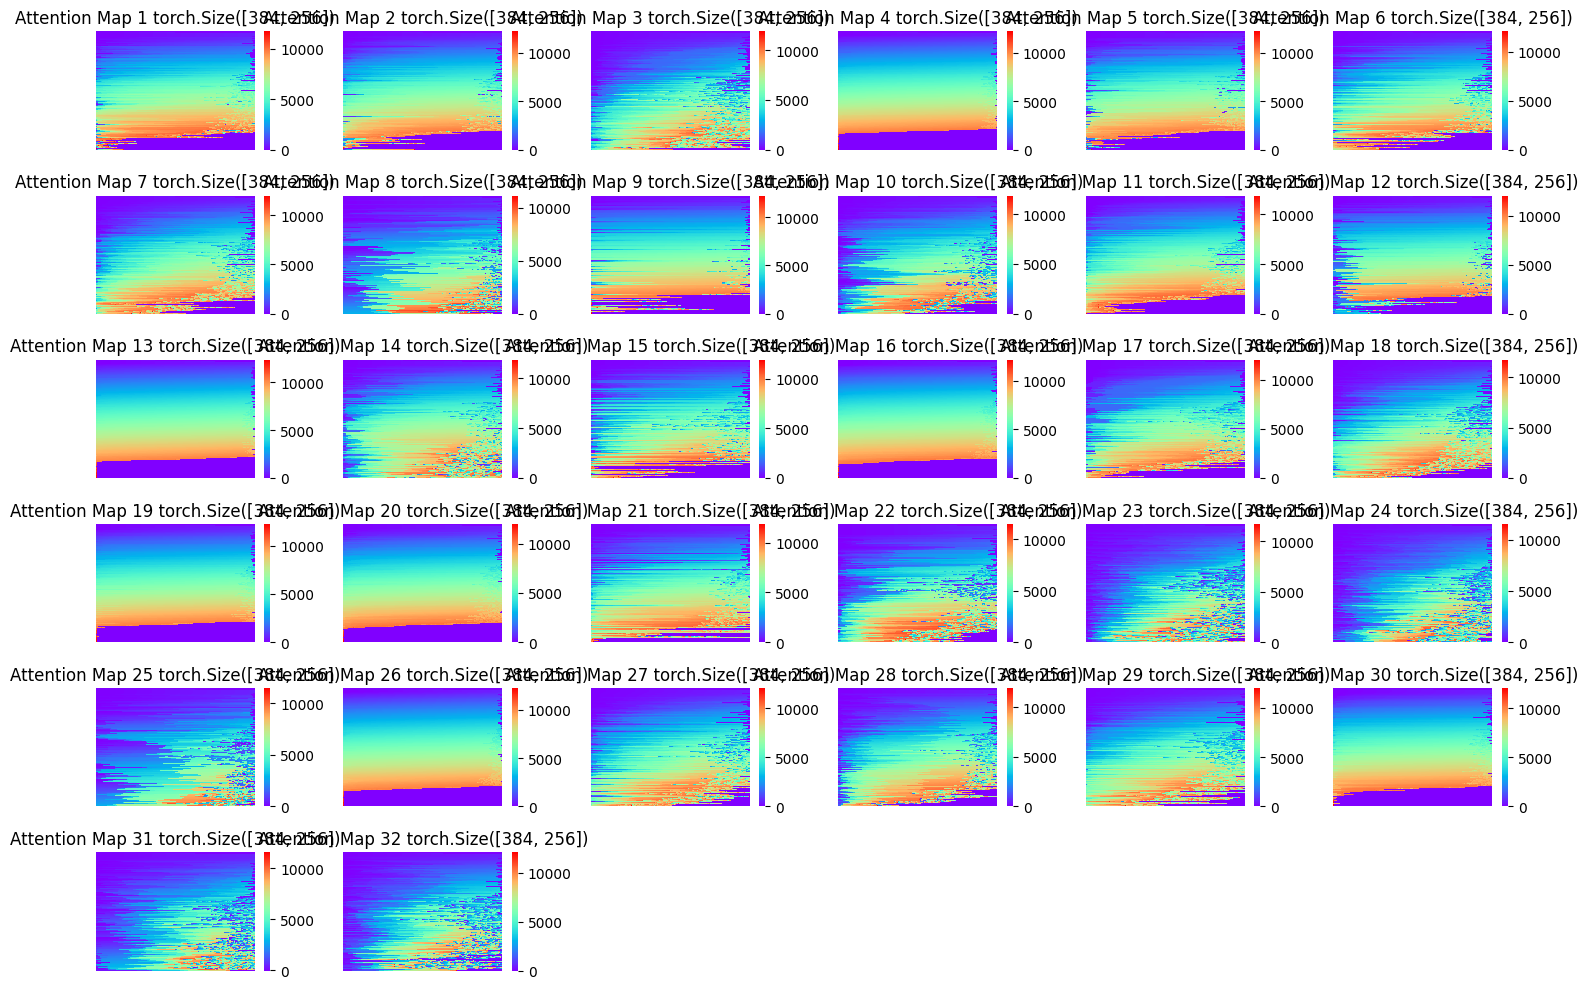

In [38]:
plot_attention_maps(long_context[1]['indices'], cmap='rainbow')  # Change cmap as needed


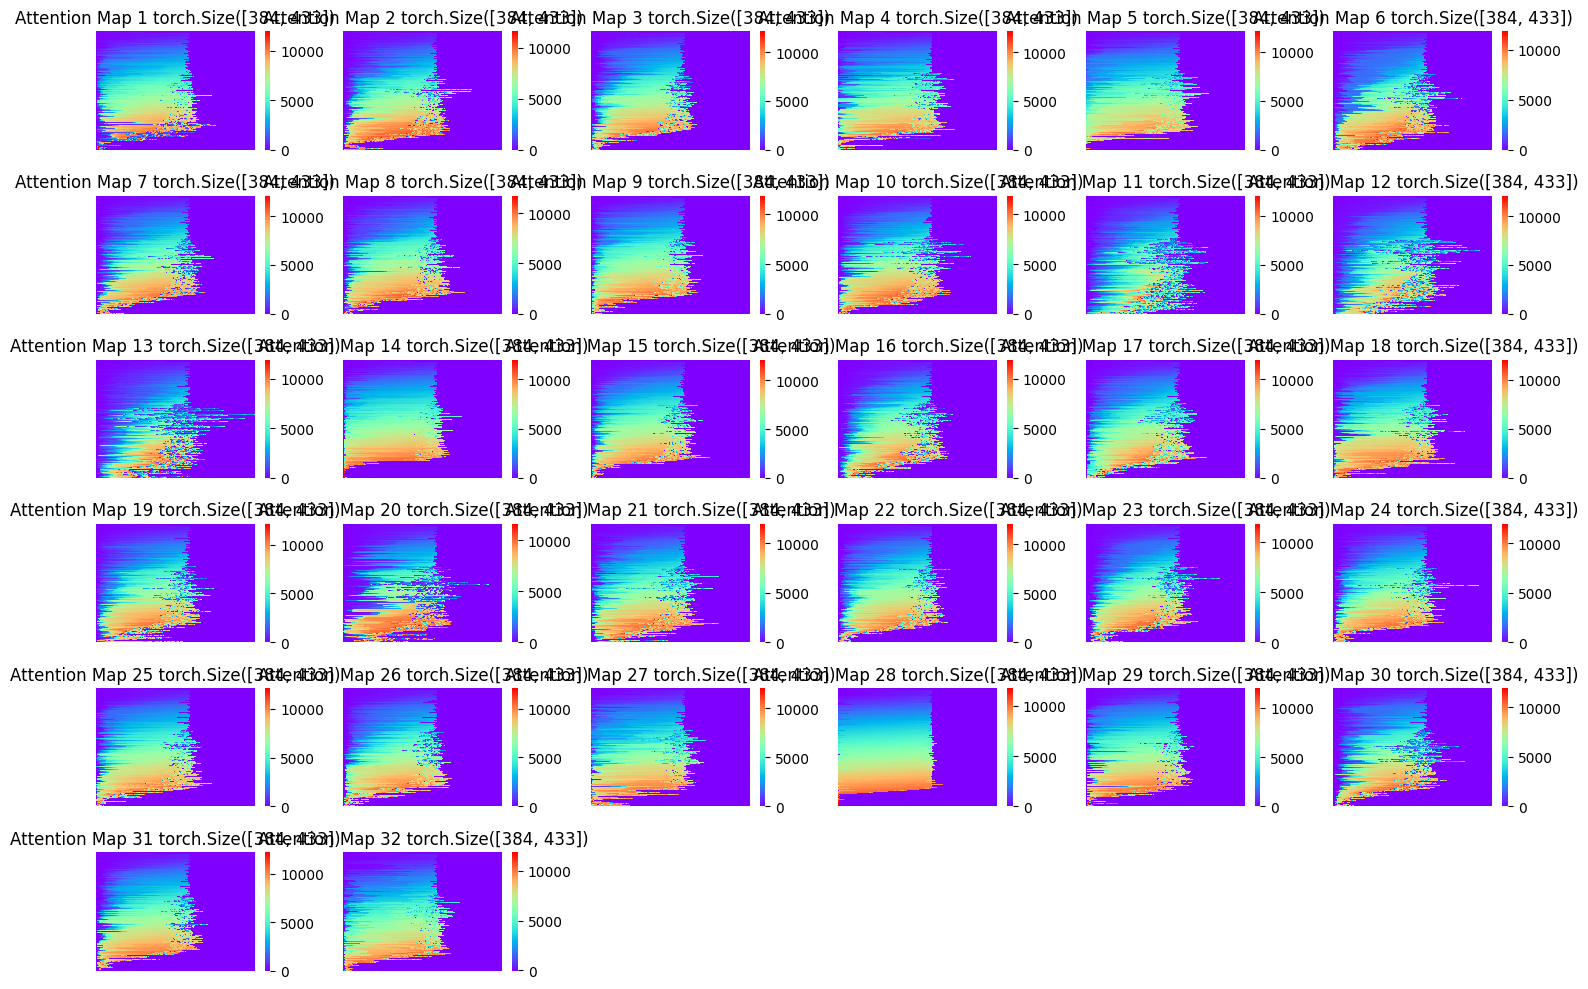

In [39]:
plot_attention_maps(long_context[2]['indices'], cmap='rainbow')  # Change cmap as needed


FileNotFoundError: [Errno 2] No such file or directory: './cache/llama/default/qkvout_k512_s12288_l0.pth'